<a href="https://colab.research.google.com/github/kevirui/Challenge-Telecom-Alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Challenge:
Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

In [2]:
import pandas as pd
import requests
import json

# Llamada a los datos
response = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
data = response.json()

# Normalizar los datos
data = pd.json_normalize(data, sep="_")

#🔧 Transformación

## Modificación para la concordacia de los datos

In [3]:
import numpy as np

# Modificación de columnas que no concuerdan con sus datos
data['customerID'] = data['customerID'].str.replace('[-A-Z]', '', regex=True)
data['account_Charges_Total'] = data['account_Charges_Total'].str.replace(' ', '0', regex=True)
data['customerID'] = data['customerID'].astype(np.int64)

# Mapeo para columnas booleanas generales
columnasBooleanas = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']
mapa_booleano_general = {'Yes': 1, 'No': 0}
for columna in columnasBooleanas:
  data[columna] = data[columna].map(mapa_booleano_general)
  data[columna] = data[columna].astype('Int64')

# Mapeo específico para columnas con 'No service'
mapa_booleano_servicios = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}
columnas_servicio = ['phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']
for columna in columnas_servicio:
  data[columna] = data[columna].map(mapa_booleano_servicios)

# Pasaje de datos a floats
data['account_Charges_Total'] = data['account_Charges_Total'].astype(float)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   int64  
 1   Churn                      7043 non-null   Int64  
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   Int64  
 5   customer_Dependents        7267 non-null   Int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   Int64  
 8   phone_MultipleLines        7267 non-null   int64  
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   int64  
 11  internet_OnlineBackup      7267 non-null   int64  
 12  internet_DeviceProtection  7267 non-null   int64  
 13  internet_TechSupport       7267 non-null   int64

## Creación de columna "Cuentas diárias"

In [5]:
data['Cuentas_diarias'] = (data['account_Charges_Monthly'] / 30).round(2)

## Estandarización y traducción de columnas

In [6]:
mapeo_columnas = {
    'customerID': 'ID_cliente',
    'Churn': 'situacion',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'estado_jubilado',
    'customer_Partner': 'estado_con_pareja',
    'customer_Dependents': 'estado_dependencia',
    'customer_tenure': 'tenencia',
    'phone_PhoneService': 'servicio_telefonico',
    'phone_MultipleLines': 'multiples_lineas',
    'internet_InternetService': 'servicio_internet',
    'internet_OnlineBackup': 'copia_de_seguridad',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_DeviceProtection': 'internet_seguro',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'servicio_streaming',
    'internet_StreamingMovies': 'servicio_peliculas',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'facturacion_sin_papel',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'cargos_mensuales',
    'account_Charges_Total': 'cargos_totales'
}

data = data.rename(columns=mapeo_columnas)

data['genero'] = data['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
data['servicio_internet'] = data['servicio_internet'].replace({'Fiber optic': 'Fibra ótica', 'DSL': 'DSL', 'No': 'No'})
data['tipo_contrato'] = data['tipo_contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Doble'})
data['metodo_pago'] = data['metodo_pago'].replace({'Electronic check': 'Cheque electrónico', 'Mailed check': 'Cheque', 'Bank transfer (automatic)': 'Transferencia bancaria', 'Credit card (automatic)': 'Tarjeta de crédito'})

#📊 Carga y análisis

## Análisis Descriptivo

### Datos Descriptivos del DataFrame

In [7]:
datosDescriptivos = data.describe()
datosDescriptivos

,ID_cliente,situacion,estado_jubilado,estado_con_pareja,estado_dependencia,tenencia,servicio_telefonico,multiples_lineas,seguridad_en_linea,copia_de_seguridad,internet_seguro,soporte_tecnico,servicio_streaming,servicio_peliculas,facturacion_sin_papel,cargos_mensuales,cargos_totales,Cuentas_diarias
count,7267.000000,7043.0,7267.000000,7267.0,7267.0,7267.000000,7267.0,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267.000000,7267.000000,7267.000000
mean,5009.601899,0.26537,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.59323,64.720098,2277.182035,2.157292
std,2857.920236,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,2.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,18.250000,0.000000,0.610000
25%,2587.000000,0.0,0.000000,0.0,0.0,9.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,35.425000,396.200000,1.180000
50%,5013.000000,0.0,0.000000,0.0,0.0,29.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,70.300000,1389.200000,2.340000
75%,7467.000000,1.0,0.000000,1.0,1.0,55.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,89.875000,3778.525000,2.995000
max,9995.000000,1.0,1.000000,1.0,1.0,72.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,118.750000,8684.800000,3.960000


### Promedio de los datos

In [8]:
promedio = datosDescriptivos.loc['mean']
promedio

,mean
ID_cliente,5009.601899
situacion,0.26537
estado_jubilado,0.162653
estado_con_pareja,0.484106
estado_dependencia,0.300124
tenencia,32.346498
servicio_telefonico,0.902711
multiples_lineas,0.42177
seguridad_en_linea,0.28595
copia_de_seguridad,0.344571


### Mediana de datos

In [9]:
medianaDatos = data.median(numeric_only=True)
medianaDatos

,0
ID_cliente,5013.0
situacion,0.0
estado_jubilado,0.0
estado_con_pareja,0.0
estado_dependencia,0.0
tenencia,29.0
servicio_telefonico,1.0
multiples_lineas,0.0
seguridad_en_linea,0.0
copia_de_seguridad,0.0


### Desviación Estándar ( cuanto se desvían los datos respecto a la media )

In [10]:
desviacion_estandar = data.std(numeric_only=True)
desviacion_estandar

,0
ID_cliente,2857.920236
situacion,0.441561
estado_jubilado,0.369074
estado_con_pareja,0.499782
estado_dependencia,0.458343
tenencia,24.571773
servicio_telefonico,0.296371
multiples_lineas,0.493876
seguridad_en_linea,0.451897
copia_de_seguridad,0.475261


### Valores nulos por columna
indica solamente las columnas que tienen valores unicos que no se pueden usar para su posterior análisis

In [11]:
valoresNulos = data.isnull().sum()
columnasNulos = valoresNulos[valoresNulos>0]
columnasNulos

,0
situacion,224


## Distribución de evasión

In [12]:
totalClientesSituacion = data['situacion'].value_counts()
totalClientesSituacion

,count
situacion,
0,5174
1,1869


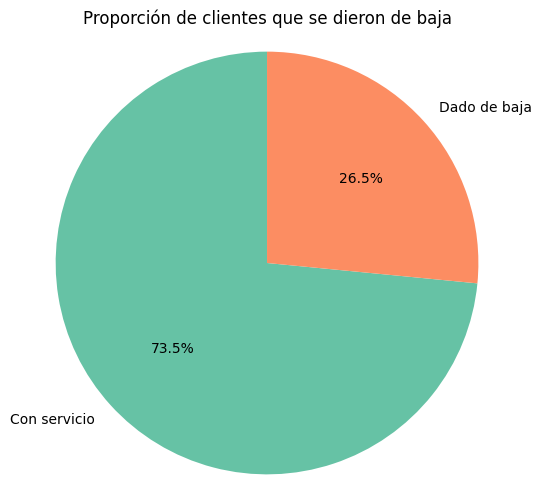

In [13]:
import matplotlib.pyplot as plt

labels = ['Con servicio', 'Dado de baja']

plt.figure(figsize=(6,6))
plt.pie(totalClientesSituacion, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('Proporción de clientes que se dieron de baja')
plt.axis('equal')
plt.show()

## Recuento de evasión por variables categóricas

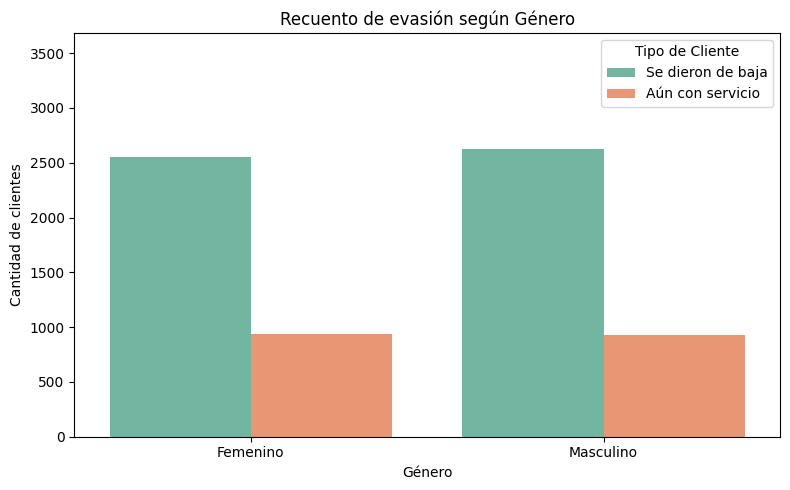

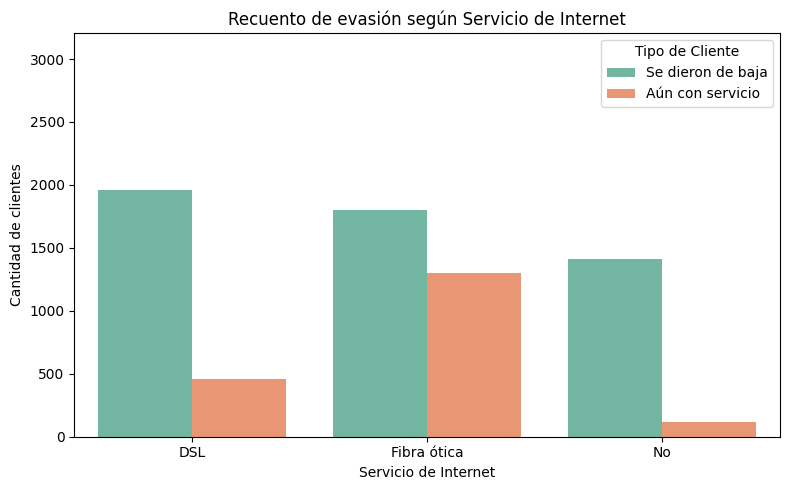

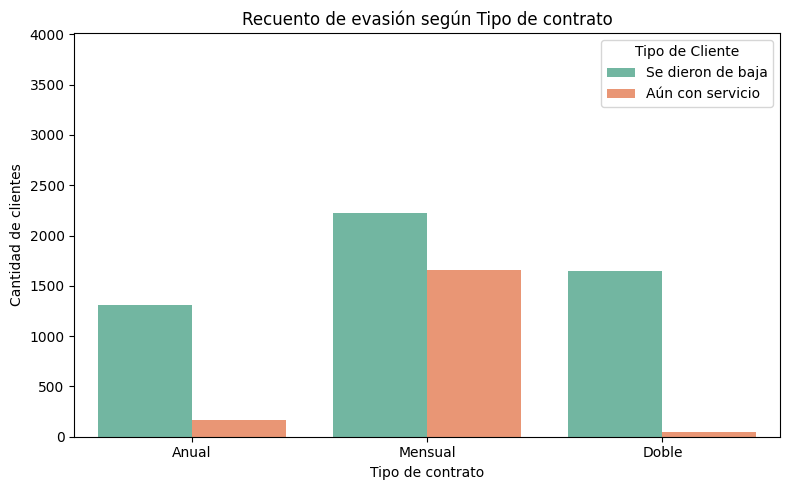

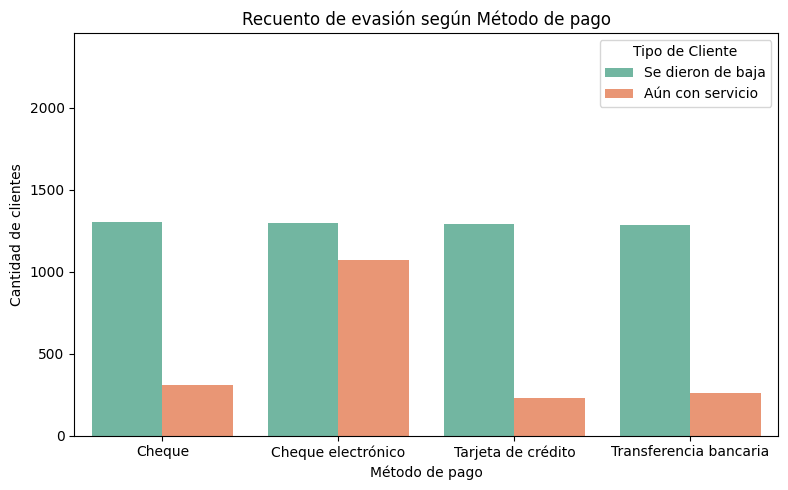

In [14]:
import seaborn as sns

# Mapear los valores numéricos de 'evasión' a texto
data['situacion_etiqueta'] = data['situacion'].map({0: 'Se dieron de baja', 1: 'Aún con servicio'})

# Lista de columnas categóricas
cat_columns = data.select_dtypes(include='object').columns.tolist()
cat_columns = [col for col in cat_columns if col != 'situacion_etiqueta']

# Diccionario con titulos más descriptivos
etiquetas_cat_columns = {
    'genero': 'Género',
    'servicio_internet': 'Servicio de Internet',
    'tipo_contrato': 'Tipo de contrato',
    'metodo_pago': 'Método de pago'
}

# Gráfico por cada variable categórica
for col in cat_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue='situacion_etiqueta', palette='Set2')
    plt.title(f'Recuento de evasión según {etiquetas_cat_columns.get(col, col)}')
    plt.xlabel(etiquetas_cat_columns.get(col, col))
    plt.ylabel('Cantidad de clientes')
    plt.ylim(0, data[col].value_counts().max() + 10)
    plt.legend(title='Tipo de Cliente')
    plt.tight_layout()
    plt.show()

## Conteo de evasión por variables numéricas

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


Estadísticas de 'cargos_mensuales':
                         mean  median        std
situacion_etiqueta                              
Aún con servicio    74.441332  79.650  24.666053
Se dieron de baja   61.265124  64.425  31.092648


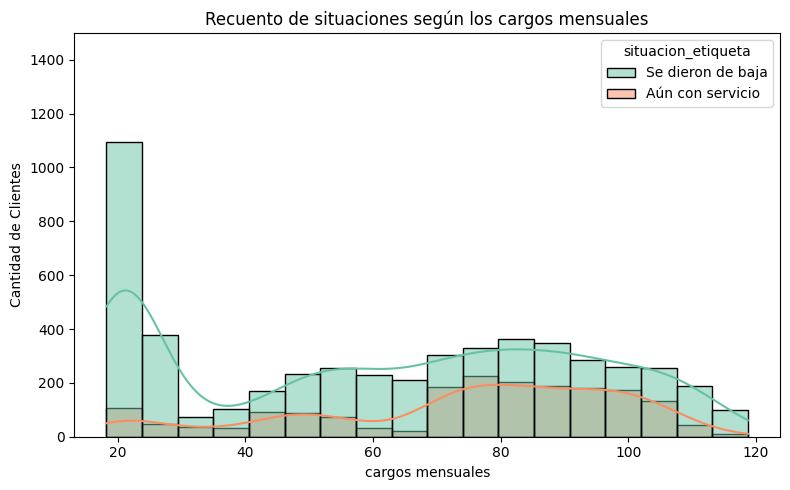


Estadísticas de 'cargos_totales':
                           mean    median          std
situacion_etiqueta                                    
Aún con servicio    1531.796094   703.550  1890.822994
Se dieron de baja   2549.911442  1679.525  2329.954215


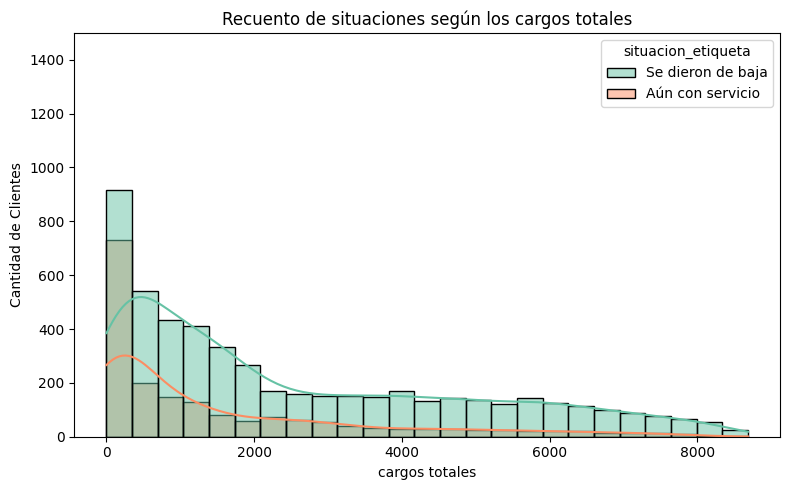


Estadísticas de 'Cuentas_diarias':
                       mean  median       std
situacion_etiqueta                           
Aún con servicio    2.48145    2.66  0.822287
Se dieron de baja   2.04208    2.15  1.036492


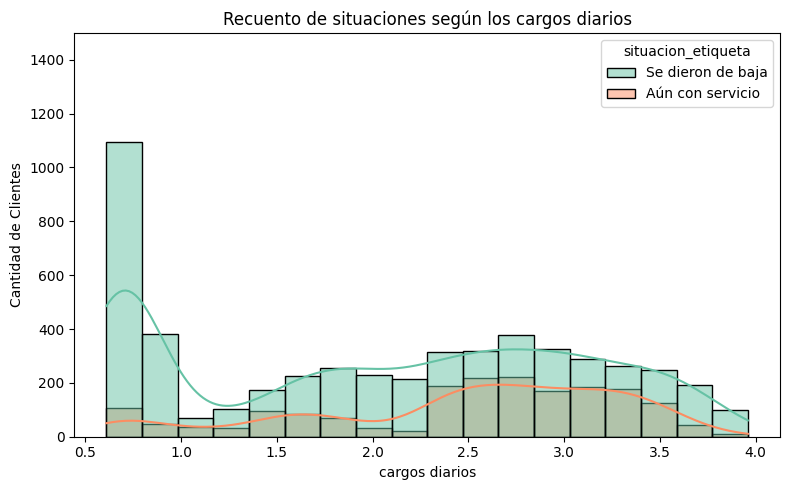


Estadísticas de 'tenencia':
                         mean  median        std
situacion_etiqueta                              
Aún con servicio    17.979133    10.0  19.531123
Se dieron de baja   37.569965    38.0  24.113777


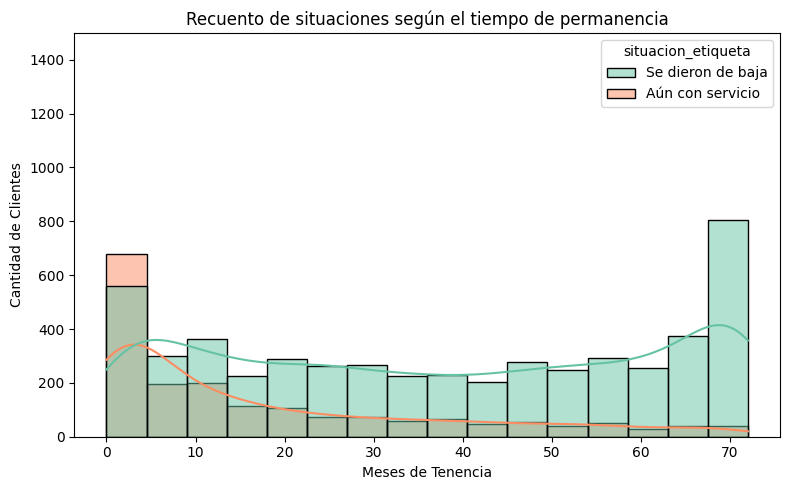

In [32]:
# Lista de variables numericas
var_columns = data.select_dtypes(include='float64').columns.tolist()
var_columns = [var for var in var_columns if var != 'situacion_etiqueta']

if 'tenencia' not in var_columns:
  var_columns += ['tenencia']

# Gráfico por cada variable categórica
for var in var_columns:
    print(f"\nEstadísticas de '{var}':")
    print(data.groupby('situacion_etiqueta')[var].agg(['mean', 'median', 'std']))
    plt.figure(figsize=(8, 5))
    ax = sns.histplot(data=data, x=var, hue='situacion_etiqueta', palette='Set2', kde=True, common_norm=False)

    if var=='tenencia':
      plt.title(f'Recuento de situaciones según el tiempo de permanencia')
      plt.xlabel('Meses de Tenencia')
    else:
      etiquetas_var_columns = {
          'cargos_mensuales': 'cargos mensuales',
          'cargos_totales': 'cargos totales',
          'Cuentas_diarias': 'cargos diarios',
      }
      plt.title(f'Recuento de situaciones según los {etiquetas_var_columns.get(var, var)}')
      plt.xlabel(etiquetas_var_columns.get(var, var))

    plt.ylabel('Cantidad de Clientes')
    ax.set_ylim(top=1500)
    plt.tight_layout()
    plt.show()

## Extra, Análisis de correlación entre variables

### Analisis de cuantos servicios contratados tiene en total los usuarios

In [16]:
servicios = ['servicio_telefonico', 'multiples_lineas', 'seguridad_en_linea', 'copia_de_seguridad', 'internet_seguro', 'soporte_tecnico', 'servicio_streaming', 'servicio_peliculas']

data['total_servicios'] = data[servicios].sum(axis=1)

### Correlación con la situación de los usuarios

In [17]:
data[['total_servicios', 'situacion']].corr()

,total_servicios,situacion
total_servicios,1.000000,-0.067264
situacion,-0.067264,1.000000


### Agrupación de datos númericos

In [18]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric

,ID_cliente,situacion,estado_jubilado,estado_con_pareja,estado_dependencia,tenencia,servicio_telefonico,multiples_lineas,seguridad_en_linea,copia_de_seguridad,internet_seguro,soporte_tecnico,servicio_streaming,servicio_peliculas,facturacion_sin_papel,cargos_mensuales,cargos_totales,Cuentas_diarias,total_servicios
0,2,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.60,593.30,2.19,4
1,3,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.90,542.40,2.00,3
2,4,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73.90,280.85,2.46,2
3,11,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98.00,1237.85,3.27,5
4,13,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.90,267.40,2.80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987,0,0,0,0,13,1,0,1,0,0,1,0,0,0,55.15,742.90,1.84,3
7263,9992,1,0,1,0,22,1,1,0,0,0,0,0,1,1,85.10,1873.70,2.84,3
7264,9992,0,0,0,0,2,1,0,0,1,0,0,0,0,1,50.30,92.75,1.68,2
7265,9993,0,0,1,1,67,1,0,1,0,1,1,0,1,0,67.85,4627.65,2.26,5


### Correlaciones entre datos númericos en base a la correlación con "situacion"

In [19]:
data_correlaciones = data_numeric.corr()['situacion'].sort_values(ascending=False)
data_correlaciones

,situacion
situacion,1.000000
Cuentas_diarias,0.193412
cargos_mensuales,0.193356
facturacion_sin_papel,0.191825
estado_jubilado,0.150889
servicio_streaming,0.063228
servicio_peliculas,0.061382
multiples_lineas,0.040102
servicio_telefonico,0.011942
ID_cliente,-0.017385


### Gráfico de matriz de correlaciones

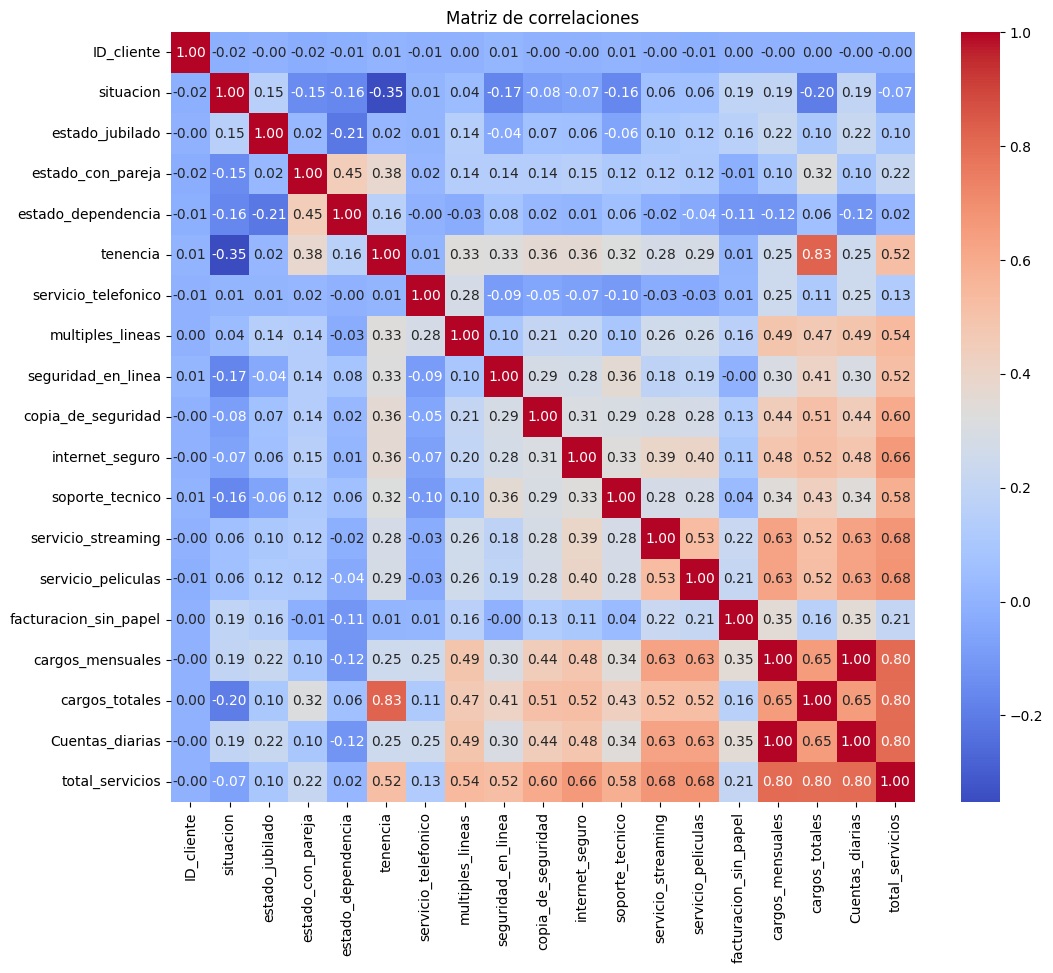

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaciones')
plt.show()

In [21]:
correlaciones = data.corr(numeric_only=True)
correlacionesSituacion = correlaciones['situacion'].sort_values(ascending=False)

#### Variables más asociadas a mayor dadas de baja

In [22]:
correlacionesSituacion[correlacionesSituacion.abs() > 0.2]

,situacion
situacion,1.000000
tenencia,-0.352229


#### Variables más asociadas a menor dadas de baja

In [23]:
correlacionesSituacion[correlacionesSituacion.abs() < 0.2]

,situacion
Cuentas_diarias,0.193412
cargos_mensuales,0.193356
facturacion_sin_papel,0.191825
estado_jubilado,0.150889
servicio_streaming,0.063228
servicio_peliculas,0.061382
multiples_lineas,0.040102
servicio_telefonico,0.011942
ID_cliente,-0.017385
internet_seguro,-0.066160


La variable "tenencia" tiene una fuerte correlación negativa con la situación del usuario, lo que indica que los usuarios más antiguos tienden a permanecer.

Los cargos mensuales muestran una correlación positiva, lo que sugiere que tarifas mensuales más altas podrían estar relacionadas con una mayor probabilidad de darse de baja, pero también los usuarios prefieren mas pagar mensualmente.

#### Gráfica de analisis en base a la situación de los clientes

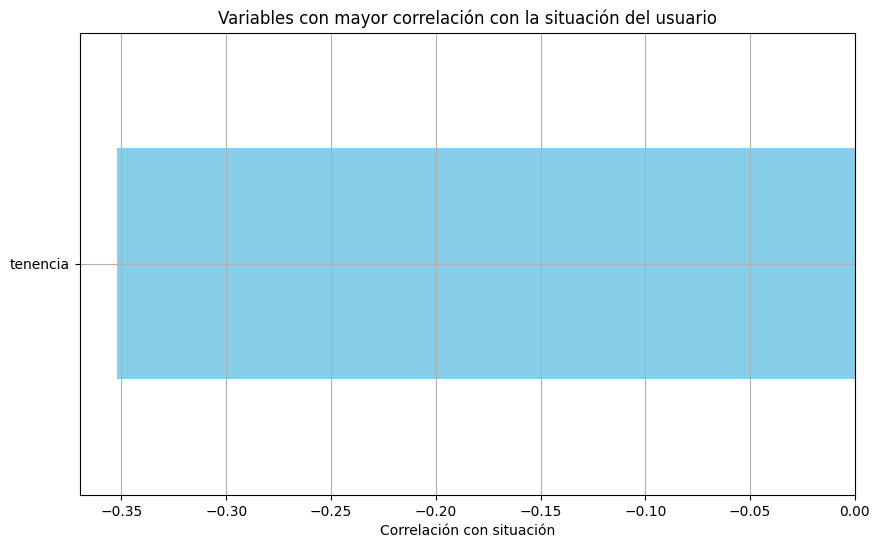

In [24]:
correlacionesFiltradas = correlacionesSituacion[abs(correlacionesSituacion) > 0.2]
correlacionesFiltradas.drop('situacion', inplace=True)

plt.figure(figsize=(10, 6))
correlacionesFiltradas.plot(kind='barh', color="skyblue")
plt.title("Variables con mayor correlación con la situación del usuario")
plt.xlabel("Correlación con situación")
plt.grid(True)
plt.show()

### Gráfico de dispersión clave

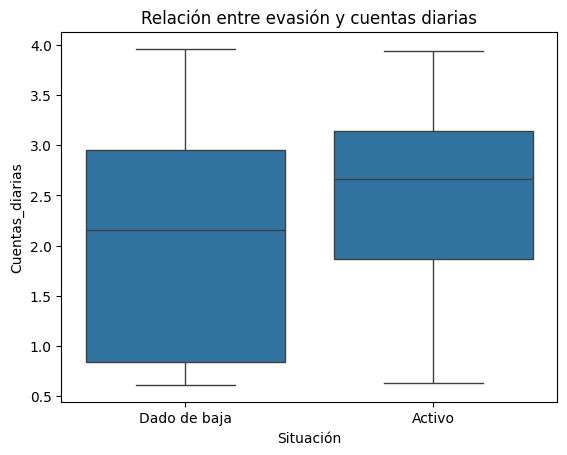

In [25]:
sns.boxplot(data=data, x='situacion', y='Cuentas_diarias')
plt.title('Relación entre evasión y cuentas diarias')
# Cambiar las etiquetas del eje x de 0 a "dado de baja" y 1 a "activo"
plt.xticks([0, 1], ['Dado de baja', 'Activo'])
plt.xlabel('Situación')
plt.show()

#📄Informe final

## Introducción:
El análisis tiene como objetivo analizar y sacar conclusiones de las mayores probabilidades de el "por que" los usuarios se dan de baja del servicio. En los ultimos periodos se han dado de baja muchos usuarios y por consecuencia han bajado los ingresos brutos de la empresa.

## Pasos realizados con los datos:
He importado las librerias de mathplotlib y pandas para el análisis de los datos, convertido los datos a traducción español, y transformación de datos string a int64 y float, con los valores "0" y "1" para su utilización posteriormente.

## Análisis Exploratorio de Datos:
Los datos analizados concuerdan con que los usuarios con servicios DSL tienden a abandonar el servicio despues de un tiempo. Al igual, los usuarios que abonan mensualmente presentan una inclinación a darse de baja.

Los usuarios muestran que mientras mas gastos diarios tengan, mas propensos son a abandonar el servicio.

Los usuarios con mas tiempo de servicio muestran mas propensos a continuar con el servicio, se piensa que por lealtad y satisfacción con la oferta de la empresa.

Los usuarios con mas servicios contratados a la larga se darán de baja.

## Conclusiones e Insights

Viendo en general al parecer los únicos usuarios fieles son los que mas tiempo perduran dentro del sistemas abonando de manera anual y no utilizando tantos servicios.

Podrían usar una técnica para mejorar las estrategias de retención: por ejemplo, ofreciendo descuentos a clientes con muchos cargos o enfocando campañas de fidelización en usuarios nuevos o con pocos servicios contratados.

Esto implica causalidad, pero brinda una base sólida para investigar más a fondo qué variables afectan la decisión de los clientes de irse.

## Conclusiones del análisis de correlación

Como análisis adicional, se exploraron las correlaciones entre distintas variables del dataset y la variable situacion, que indica si un cliente sigue activo o ha abandonado el servicio

Los resultados muestran que algunas variables presentan una relación significativa con la evasión:

- "tenencia" tiene una correlación negativa fuerte (-0.35), lo que indica que los clientes con mayor antigüedad tienden a permanecer más tiempo en la empresa.

- "total_servicios" se correlaciona positivamente (0.52) con la evasión, sugiriendo que a mayor cantidad de servicios contratados, mayor es la probabilidad de cancelación.

- "cargos_totales" (0.19) y "cargos_mensuales" (0.20) muestran correlación positiva con la evasión, lo que podría indicar que precios más altos generan insatisfacción o mayor propensión a abandonar.

